# Content

In this notebook, we will use Sklearn's implementaion of One class SVM to find anomalies

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.svm import OneClassSVM
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

## Loading the dataset

In [29]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

Let's add some anomalies

In [31]:
n_anomalies = 10
anomalies = np.random.uniform(low=8, high=12, size=(n_anomalies, X.shape[1]))
df_anomalies = pd.DataFrame(anomalies, columns=iris.feature_names)
df_anomalies['target'] = -1

# Combine the normal data with anomalies
df_combined = pd.concat([df, df_anomalies], ignore_index=True)

# Shuffle the data
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

## Reducing with TSNE

we will reduce our input features to 3 dimensions to better challenge the One-Class SVM and so we can visualize the data points

In [34]:
X_combined = df_combined.drop('target', axis=1)
y_combined = df_combined['target']

In [35]:
tsne = TSNE(n_components=3, random_state=42)
X_combined_reduced = tsne.fit_transform(X_combined)

## Training One-Class SVM

Train the One-Class SVM on normal data (ignoring anomalies)

In [36]:
clf = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
clf.fit(X_combined_reduced[y_combined != -1])

OneClassSVM(gamma=0.1, nu=0.05)

## Predicting the anomalies

In [38]:
y_pred = clf.predict(X_combined_reduced)
df_combined['pred'] = y_pred

# Calculate the detection rate
true_anomalies = df_combined[df_combined['target'] == -1]
detected_anomalies = df_combined[(df_combined['pred'] == -1)]

print(f"Total anomalies added: {n_anomalies}")
print(f"Anomalies detected: {len(detected_anomalies)}")

Total anomalies added: 10
Anomalies detected: 19


In [39]:
gt_anomaly_mask = df_combined['target'] == -1
pred_anomaly_mask = df_combined['pred'] == -1

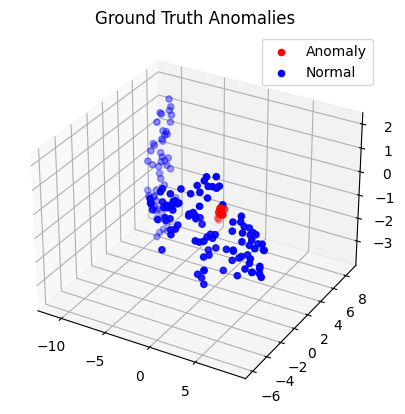

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

mask = gt_anomaly_mask.values

anomaly_samples = X_combined_reduced[mask]
normal_samples = X_combined_reduced[~mask]

ax.scatter(anomaly_samples[:, 0], anomaly_samples[:, 1], anomaly_samples[:, 2], c='r', label='Anomaly')
ax.scatter(normal_samples[:, 0], normal_samples[:, 1], normal_samples[:, 2], c='b', label='Normal')

plt.title("Ground Truth Anomalies")
plt.legend()

plt.show()

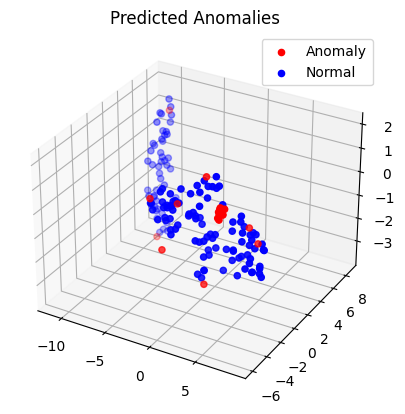

In [54]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

mask = pred_anomaly_mask.values

anomaly_samples = X_combined_reduced[mask]
normal_samples = X_combined_reduced[~mask]

ax.scatter(anomaly_samples[:, 0], anomaly_samples[:, 1], anomaly_samples[:, 2], c='r', label='Anomaly')
ax.scatter(normal_samples[:, 0], normal_samples[:, 1], normal_samples[:, 2], c='b', label='Normal')

plt.title("Predicted Anomalies")
plt.legend()

plt.show()